In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
df=pd.read_csv('stroke.csv')

In [3]:
df['gender']=df['gender'].replace(['Male', 'Female', 'Other'],[1,2,3])
df['ever_married']=df['ever_married'].replace(['Yes', 'No'], [1,2])
df['work_type']=df['work_type'].replace(['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'],[1,2,3,4,5])
df['Residence_type']=df['Residence_type'].replace(['Urban', 'Rural'], [1,2])
df['smoking_status']=df['smoking_status'].replace(['never smoked','formerly smoked','smokes'],[1,2,3])
df['smoking_status']=df['smoking_status'].replace(['Unknown'],np.NaN)

In [4]:
bmi_mean=df.bmi.mean()
values={'bmi':int(bmi_mean)}
df=df.fillna(value=values)
df.bmi.isnull().any()

False

In [5]:
df=df.dropna()
df=df.drop('id', axis=1)

In [6]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [8]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8925233644859814


In [10]:
    
def decision_tree(X, Y, criterion, max_depth):
        
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.4, random_state=1)
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred)

In [11]:
results = []
criterions = ['gini', 'entropy']
max_depth=[2, 3, 4, 5, 6]

for criterion in criterions:
    small_list = []
    for depth in max_depth:
        small_list.append(decision_tree(X, Y, criterion, depth))
    results.append(small_list)
    
print(results)

[[0.9425233644859813, 0.9425233644859813, 0.9415887850467289, 0.9383177570093458, 0.9373831775700935], [0.9429906542056075, 0.9429906542056075, 0.9415887850467289, 0.9411214953271028, 0.9341121495327103]]


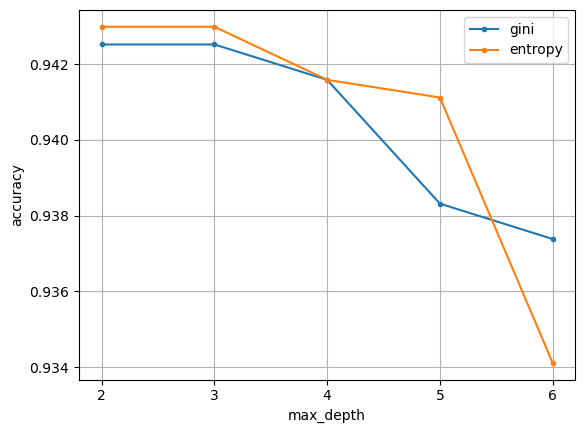

In [12]:
fig, ax = plt.subplots()

ax.plot(max_depth, results[0], label='gini', marker='.')
ax.plot(max_depth, results[1], label='entropy', marker='.')
ax.set_xticks([2,3,4,5,6])
ax.set_xlabel("max_depth")
ax.set_ylabel("accuracy")  
ax.grid()
plt.legend()
plt.savefig('decision_tree.png')


In [13]:
def decision_tree(X, Y, r_state):
        
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=r_state)
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_pred_train=clf.predict(X_train)
    return metrics.accuracy_score(y_test, y_pred), metrics.accuracy_score(y_train, y_pred_train)


In [14]:
decision_tree(X, Y, 42)

(0.930841121495327, 0.9483173076923077)

In [15]:
results_train = []
results_test = []

for i in range(50):
    results = decision_tree(X, Y, i)
    results_train.append(results[0])
    results_test.append(results[1])

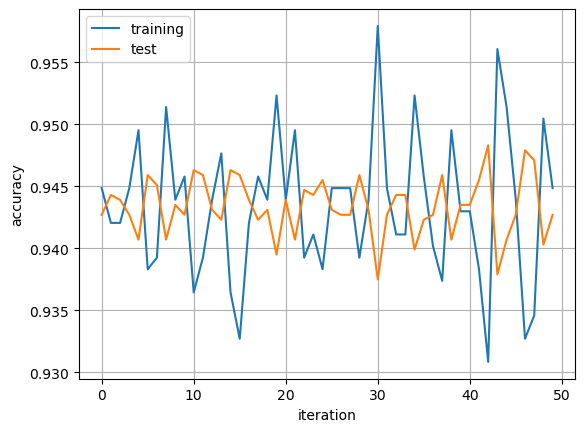

In [16]:
fig, ax = plt.subplots()

ax.plot(results_train, label="training")
ax.plot(results_test, label="test")
ax.set_xlabel("iteration")
ax.set_ylabel("accuracy")
ax.grid()
plt.legend()
plt.savefig('decision_tree_symulation.png')